# Exploratory Data Analysis **(EDA)** & Pre-processing steps

## `AZIDAS` dataset:  Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).

This notebook performs Exploratory Data Analysis and pre-processing (data standarization and cleaning) of the `AZIDAS` dataset containing demographics for the general population of Germany.

# 00. Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
    from tqdm import tqdm
except:
    !pip install tqdm
    from tqdm import tqdm    
%matplotlib inline


### my utils

from eda_utils import *

---

# 01. Import dataset
We know that the separator is a semicolon (;), and the first row contains the column names. Also, one of the columns 'LNR' is really the `ID` number, and should not be considered a standard "feature". 

In [2]:
#plot raw header to inspect dataset
!head -n 2 ../arvato_data/Udacity_AZDIAS_052018.csv

LNR;AGER_TYP;AKT_DAT_KL;ALTER_HH;ALTER_KIND1;ALTER_KIND2;ALTER_KIND3;ALTER_KIND4;ALTERSKATEGORIE_FEIN;ANZ_HAUSHALTE_AKTIV;ANZ_HH_TITEL;ANZ_KINDER;ANZ_PERSONEN;ANZ_STATISTISCHE_HAUSHALTE;ANZ_TITEL;ARBEIT;BALLRAUM;CAMEO_DEU_2015;CAMEO_DEUG_2015;CAMEO_INTL_2015;CJT_GESAMTTYP;CJT_KATALOGNUTZER;CJT_TYP_1;CJT_TYP_2;CJT_TYP_3;CJT_TYP_4;CJT_TYP_5;CJT_TYP_6;D19_BANKEN_ANZ_12;D19_BANKEN_ANZ_24;D19_BANKEN_DATUM;D19_BANKEN_DIREKT;D19_BANKEN_GROSS;D19_BANKEN_LOKAL;D19_BANKEN_OFFLINE_DATUM;D19_BANKEN_ONLINE_DATUM;D19_BANKEN_ONLINE_QUOTE_12;D19_BANKEN_REST;D19_BEKLEIDUNG_GEH;D19_BEKLEIDUNG_REST;D19_BILDUNG;D19_BIO_OEKO;D19_BUCH_CD;D19_DIGIT_SERV;D19_DROGERIEARTIKEL;D19_ENERGIE;D19_FREIZEIT;D19_GARTEN;D19_GESAMT_ANZ_12;D19_GESAMT_ANZ_24;D19_GESAMT_DATUM;D19_GESAMT_OFFLINE_DATUM;D19_GESAMT_ONLINE_DATUM;D19_GESAMT_ONLINE_QUOTE_12;D19_HANDWERK;D19_HAUS_DEKO;D19_KINDERARTIKEL;D19_KONSUMTYP;D19_KONSUMTYP_MAX;D19_KOSMETIK;D19_LEBENSMITTEL;D19_LETZTER_KAUF_BRANCHE;D19_LOTTO;D19_NAHRUNGSERGAENZUNG;D19_RATGEBE

In [3]:
# count features
!head -n 1 ../arvato_data/Udacity_AZDIAS_052018.csv | tr ";" "\n" | wc -l

366


In [4]:
# show features
!head -n 1 ../arvato_data/Udacity_AZDIAS_052018.csv | tr ";" "\n" | sort

AGER_TYP
AKT_DAT_KL
ALTER_HH
ALTER_KIND1
ALTER_KIND2
ALTER_KIND3
ALTER_KIND4
ALTERSKATEGORIE_FEIN
ALTERSKATEGORIE_GROB
ANREDE_KZ
ANZ_HAUSHALTE_AKTIV
ANZ_HH_TITEL
ANZ_KINDER
ANZ_PERSONEN
ANZ_STATISTISCHE_HAUSHALTE
ANZ_TITEL
ARBEIT
BALLRAUM
CAMEO_DEU_2015
CAMEO_DEUG_2015
CAMEO_INTL_2015
CJT_GESAMTTYP
CJT_KATALOGNUTZER
CJT_TYP_1
CJT_TYP_2
CJT_TYP_3
CJT_TYP_4
CJT_TYP_5
CJT_TYP_6
D19_BANKEN_ANZ_12
D19_BANKEN_ANZ_24
D19_BANKEN_DATUM
D19_BANKEN_DIREKT
D19_BANKEN_GROSS
D19_BANKEN_LOKAL
D19_BANKEN_OFFLINE_DATUM
D19_BANKEN_ONLINE_DATUM
D19_BANKEN_ONLINE_QUOTE_12
D19_BANKEN_REST
D19_BEKLEIDUNG_GEH
D19_BEKLEIDUNG_REST
D19_BILDUNG
D19_BIO_OEKO
D19_BUCH_CD
D19_DIGIT_SERV
D19_DROGERIEARTIKEL
D19_ENERGIE
D19_FREIZEIT
D19_GARTEN
D19_GESAMT_ANZ_12
D19_GESAMT_ANZ_24
D19_GESAMT_DATUM
D19_GESAMT_OFFLINE_DATUM
D19_GESAMT_ONLINE_DATUM
D19_GESAMT_ONLINE_QUOTE_12
D19_HANDWERK
D19_HAUS_DEKO
D19_KINDERARTIKEL
D19_KONSUMTYP
D19_KONSUMTYP_MAX
D19_KOSMETIK
D19_LEBENSMITTEL
D19_LETZTER_KAUF_BRANCHE
D19_LOTTO
D19_NAH

I have a machine with 32GB of `RAM`, so the dataset can be loaded and pre-processed in memory. Hence `low_memory = False`, allows for faster loads and better column type inference.

In [5]:
%%time
azdias = pd.read_csv('../arvato_data/Udacity_AZDIAS_052018.csv', sep=';', low_memory = False, index_col = 'LNR') 
azdias

CPU times: user 34.8 s, sys: 3.9 s, total: 38.7 s
Wall time: 38.7 s


,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
LNR,,,,,,,,,,,,,,,,,,,,,
910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,0.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,0.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,0.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825761,-1,5.0,17.0,NaN,NaN,NaN,NaN,17.0,15.0,0.0,...,2.0,4.0,7.0,8.0,3.0,4.0,3.0,4,2,3
825771,-1,9.0,16.0,NaN,NaN,NaN,NaN,16.0,11.0,0.0,...,4.0,6.0,9.0,6.0,6.0,9.0,5.0,6,1,2
825772,-1,1.0,17.0,NaN,NaN,NaN,NaN,17.0,3.0,0.0,...,2.0,7.0,10.0,8.0,NaN,5.0,7.0,4,2,2


---

# 02. Missing features

## 02.01. Intro



Before exploring the values contained in the cells, it is essential to understand how many missing values are present. I.e. values that were **not entered**, now "unknown" from the perspective of the data curator, the latter will come later.

CPU times: user 969 ms, sys: 260 ms, total: 1.23 s
Wall time: 1.54 s


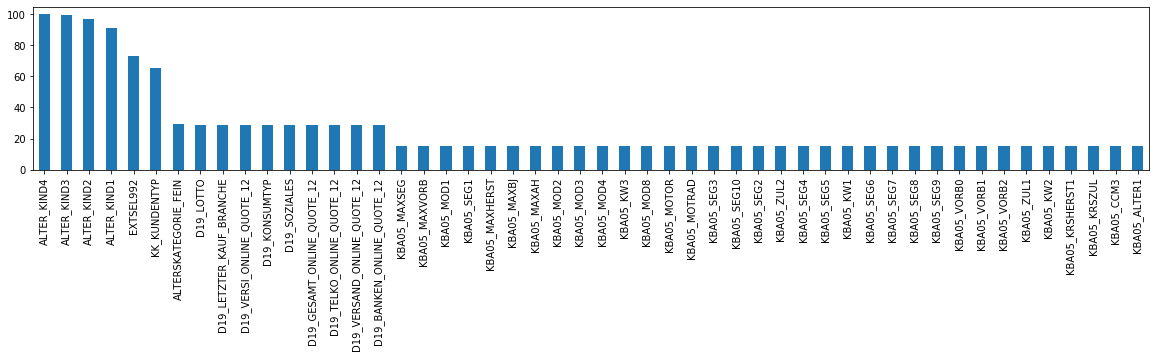

In [6]:
%%time
empty_cells = pd.isnull(azdias).sum()*100.0/azdias.shape[0]
empty_cells = empty_cells.sort_values(ascending=False)
empty_cells[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing features

(Above) a barplot showing 50 most missing features, ordered by the percentage of missing values.

(Below) Histogram showing that most features have `NAs` less than 20% of the time:

[]

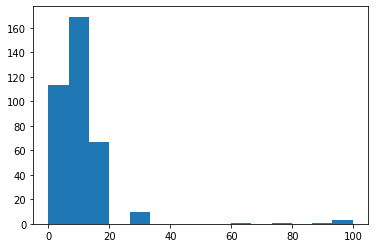

In [7]:
plt.hist(empty_cells,bins=15)
plt.plot()

For subsequent steps in pre-processing, I will be establishing a cutoff threshold for a feature removal: called `missingness_threshold_percentage`. 
> If a feature is missing more or equal to `missingness_threshold_percentage`% of its entries, I am removing that feature from subsequent analysis. Since the data is describing general population, and high values of missingness might introduce a lot of spuriousness to the analysis. 


In [8]:
missingness_threshold_percentage=30

In [9]:
np.sum(empty_cells>=missingness_threshold_percentage)

6

For now, with 30% cut-off threshold I would remove **6 features**. But I will postpose this step for now to identify other entries annotated as "missing/unknown".

## 02.02. Undefined features
I am utilizing provided matadata file `DIAS Attributes - Values 2017.xlsx` to extract the possible value types for defined features (columns in `azidas` dataset).

Due to the specific formatting, a forward-fill function is applied `ffill`. 

Upon manual inspection, the values for "unknown" are sometimes encoded as -1, sometimes as 0 or 9, and sometimes as both -1,9 or 0. But there are features in which for example 0 does not mean unknown. And there are features marked with string `...` indicating a **float values**, as opposed to a categorical one.

In this step, I am going to count number of "unknown" entries per feature. The idea is that "missing entries" (point 02.01) and unknown entries "02.02" might have different sources, but inevitabely lead to the same conclusions for the sake of the analysis -> unavailable data.

I am going to use the keyword "unknown" to match the values in the column "meaning", to extract a dataframe of attributes and its values defining unknown entries:

And now I will change values in loaded dataset: `azdias` that match the missing values in specified attributes to `NANs`:

In [10]:
metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"
azdias,missing_metadata_annotations,not_present_features = unknown_to_nan(azdias, metadata_attributes , 'unknown|no transactions known') 

Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTER_KIND1 feature is missing metadata annotation!
Warning! ALTER_KIND2 feature is missing metadata annotation!
Warning! ALTER_KIND3 feature is missing metadata annotation!
Warning! ALTER_KIND4 feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CAMEO_INTL_2015 feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJT_TYP_4 fe

In [11]:
print("{} dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations), len(not_present_features) ) )

93 dataset features lacking metadata information, while there are 42 features not used by provided dataset. 


## 02.03. Features renaming & discussion
To investigate, let's take **for example** features that have "D19" in their name from both dataset and metadata information:

In [12]:
[x for x in  not_present_features if "D19" in x]

['D19_DROGERIEARTIKEL_RZ',
 'D19_HANDWERK_RZ',
 'D19_TECHNIK_RZ',
 'D19_TELKO_MOBILE_RZ',
 'D19_BILDUNG_RZ',
 'D19_KINDERARTIKEL_RZ',
 'D19_REISEN_RZ',
 'D19_HAUS_DEKO_RZ',
 'D19_GARTEN_RZ',
 'D19_KOSMETIK_RZ',
 'D19_BIO_OEKO_RZ',
 'D19_VOLLSORTIMENT_RZ',
 'D19_BANKEN_REST_RZ',
 'D19_VERSICHERUNGEN_RZ',
 'D19_VERSAND_REST_RZ',
 'D19_SONSTIGE_RZ',
 'D19_NAHRUNGSERGAENZUNG_RZ',
 'D19_TIERARTIKEL_RZ',
 'D19_TELKO_REST_RZ',
 'D19_LEBENSMITTEL_RZ',
 'D19_KK_KUNDENTYP',
 'D19_SCHUHE_RZ',
 'D19_ENERGIE_RZ',
 'D19_FREIZEIT_RZ',
 'D19_BANKEN_GROSS_RZ',
 'D19_BANKEN_DIREKT_RZ',
 'D19_RATGEBER_RZ',
 'D19_DIGIT_SERV_RZ',
 'D19_BEKLEIDUNG_REST_RZ',
 'D19_BANKEN_LOKAL_RZ',
 'D19_WEIN_FEINKOST_RZ',
 'D19_BUCH_RZ',
 'D19_SAMMELARTIKEL_RZ',
 'D19_LOTTO_RZ',
 'D19_BEKLEIDUNG_GEH_RZ']

In [13]:
[x for x in  missing_metadata_annotations if "D19" in x]

['D19_BANKEN_GROSS',
 'D19_LEBENSMITTEL',
 'D19_HANDWERK',
 'D19_WEIN_FEINKOST',
 'D19_BANKEN_LOKAL',
 'D19_KINDERARTIKEL',
 'D19_SAMMELARTIKEL',
 'D19_TELKO_ONLINE_QUOTE_12',
 'D19_VERSI_OFFLINE_DATUM',
 'D19_BIO_OEKO',
 'D19_VERSAND_REST',
 'D19_BANKEN_REST',
 'D19_ENERGIE',
 'D19_VOLLSORTIMENT',
 'D19_FREIZEIT',
 'D19_SCHUHE',
 'D19_SONSTIGE',
 'D19_NAHRUNGSERGAENZUNG',
 'D19_REISEN',
 'D19_BUCH_CD',
 'D19_GARTEN',
 'D19_BANKEN_DIREKT',
 'D19_LETZTER_KAUF_BRANCHE',
 'D19_VERSI_ONLINE_DATUM',
 'D19_RATGEBER',
 'D19_SOZIALES',
 'D19_BILDUNG',
 'D19_KONSUMTYP_MAX',
 'D19_VERSICHERUNGEN',
 'D19_BEKLEIDUNG_REST',
 'D19_TELKO_REST',
 'D19_KOSMETIK',
 'D19_TECHNIK',
 'D19_BEKLEIDUNG_GEH',
 'D19_TIERARTIKEL',
 'D19_DIGIT_SERV',
 'D19_VERSI_ONLINE_QUOTE_12',
 'D19_LOTTO',
 'D19_TELKO_MOBILE',
 'D19_VERSI_DATUM',
 'D19_HAUS_DEKO',
 'D19_DROGERIEARTIKEL']

It seems that there are examples, like:

- `D19_TELKO_MOBILE` (present in `AZIDAS` dataset), but lacking metadata entry, however the `D19_TELKO_MOBILE_RZ` is defined in metadata.

- `D19_BANKEN_GROSS` in the dataset, and `D19_BANKEN_GROSS_RZ` in metadata

for this particular example, it is perhaps worth assuming that these features refer to the same concept. 

It is particularly important to reduce the number of data fields that lack metadata information, as we need to define a concept of missingness. For example `D19_TELKO_MOBILE_RZ` in provided metadata file defines the fields as: "transactional activity based on the product group MOBILE COMMUNICATION", and is described by several categories:

```
0	no transaction known
1	Multibuyer 0-12 months
2	Doublebuyer 0-12 months
3	Singlebuyer 0-12 months
4	Multi-/Doublebuyer 13-24 months
5	Singlebuyer 13-24 months
6	Buyer > 24 months
7	Prospects > 24 months
```

We might wonder what this `0` means really - this would be a question to the data curator. 


If 0 label (no known transation) is interpreted as a lack of knowledge, i.e. missing value, then this value **in reality** could be really one of the 1-7 classes. Thus 0 would be associated with uncertainity, i.e. missing value. Then we can either drop it, or try to impute it based on other features. But if we're certain that it indicates no transations, then it is a valid category in itself. 

One thing is that `D19_TELKO_MOBILE` feature does not hold any `NAs` values in the loaded dataframe:

In [14]:
np.sum(np.isnan(azdias['D19_TELKO_MOBILE']))

0

In [15]:
list(zip( np.unique(azdias['D19_TELKO_MOBILE'], return_counts=True)[0],np.unique(azdias['D19_TELKO_MOBILE'], return_counts=True)[1] ))

[(0, 726804),
 (1, 1945),
 (2, 3558),
 (3, 16429),
 (4, 3573),
 (5, 14257),
 (6, 116433),
 (7, 8222)]

while the `0` annotation is clearly the most frequently occuring one. I.e. if it were interpreted as missing, then we'd probably remove this column (feature) altogether.

In this apprach I will modify the provided metadata file: make a copy named `Amended Copy of DIAS Attributes - Values 2017.xlsx` that contains re-named features manually identified to reflect the same characteristic of the data. 

In [16]:
np.unique(azdias['STRUKTURTYP'].dropna())

array([1., 2., 3.])

## 02.04. Missing features: correction

In [17]:
print("{} dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations), len(not_present_features) ) )

93 dataset features lacking metadata information, while there are 42 features not used by provided dataset. 


As we see in the cell output above there are a couple of non-common features between the dataset and the provided metadata, namely
1. There are **93** feature names defined in the provided dataset that lack the exact definition in provided metadata.

2. There are 8 entries in the metadata, that were not provided for the dataset.

Whereas the (2) point is not that important (there might have been more features described, but they didn't make it to the final dataset for some reason) the first step requires some attention. If we're missing annotations for 93 features, then we're missing a source of the "unknown/undefined/NA", that could help us standardize the unknown tokens in the dataset.

I've prepared a file `azdias_corrected_features.tsv` that maps some of the column names in `azdias` dataset to metadata information stored in `DIAS Attributes - Values 2017.xlsx`. I've managed to manually correct **38** features, among them many with `D19` prefix discussed above. 

The same function can take an optinal argument `rename_columns` that takes in a tab-separated file (`.tsv`) with columns `data` and `metadata`, and maps (replaces only for complete cases) the columns in provided dataframe `azidas` from `data -> metadata`, so that now the loaded dataframe has renamed columns that match some of the identified entries in metadata.

In [59]:
metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"
azdias,missing_metadata_annotations,not_present_features = unknown_to_nan(azdias, metadata_attributes , 'unknown|no transactions known',
                                                                         rename_columns='azdias_corrected_features.tsv') 

Renaming columns according to provided file: azdias_corrected_features.tsv
Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJT_TYP_4 feature is missing metadata annotation!
Warning! CJT_TYP_5 feature is missing metadata annotation!
Warning! CJT_TYP_6 feature is missing metadata annotation!
Warning! D19_KONSUMTYP_MAX feature is missing metadata annotation!
Warning! D1

In [60]:
np.unique(azdias['D19_GESAMT_ONLINE_QUOTE_12'].dropna(),return_counts=True)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([   850,   1035,   3441,    987,  10181,   1638,   6685,   9121,
          5817, 192864]))

In [61]:
print("{} dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations), len(not_present_features) ) )

50 dataset features lacking metadata information, while there are 31 features not used by provided dataset. 


We see now that it has reduced substantially (by **38**) the number of features for which we don't have metadata information, while only 4 features in metadata remain unused.

In [20]:
not_present_features

['HAUSHALTSSTRUKTUR', 'GEOSCORE_KLS7', 'WACHSTUMSGEBIET_NB', 'BIP_FLAG']

Unfortunately, these four features couldn't be identified back to provided dataset `Azdias`, and hance would remain unused. Perhaps `customers` dataset would include them.

Let's look back at our missingness information:

---

CPU times: user 1.02 s, sys: 201 ms, total: 1.22 s
Wall time: 1.22 s


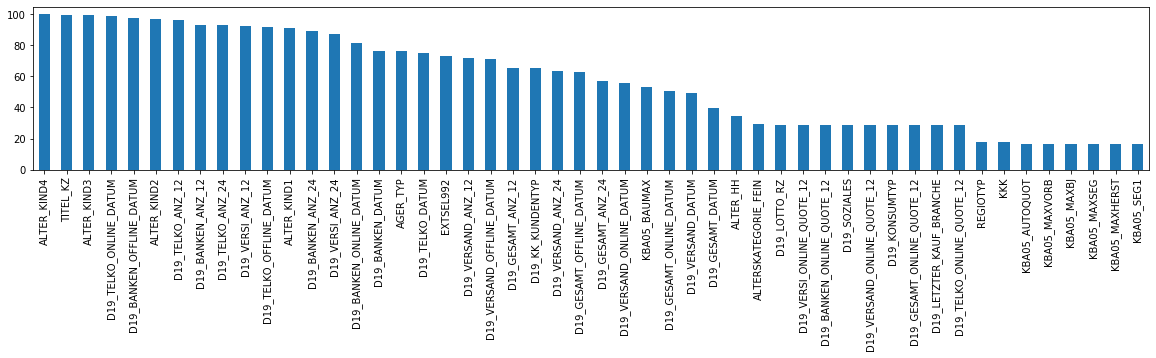

In [21]:
%%time
empty_cells = pd.isnull(azdias).sum()*100.0/azdias.shape[0]
empty_cells = empty_cells.sort_values(ascending=False)
empty_cells[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing features

In [22]:
np.sum(empty_cells>missingness_threshold_percentage)

32

## 02.05. Feature Missingness filtering

After identifying number of empty cells (`NaNs`, and convering unknown values to `NaNs` I'll filter (remove) features that exhibit missingnes above `missingness_threshold_percentage`

In [23]:
%%time
features_to_drop =list( (empty_cells[empty_cells>missingness_threshold_percentage]).index.values)
azdias.drop(labels=features_to_drop,inplace=True,axis='columns')

CPU times: user 439 ms, sys: 537 ms, total: 976 ms
Wall time: 971 ms


We see that now more features have the `NA` values, previously encoded by various labels, like 0, -1, or 9. Hence an increase in overall missingness percentage. 

Plot again missingness after removal:

CPU times: user 1.03 s, sys: 179 ms, total: 1.21 s
Wall time: 1.21 s


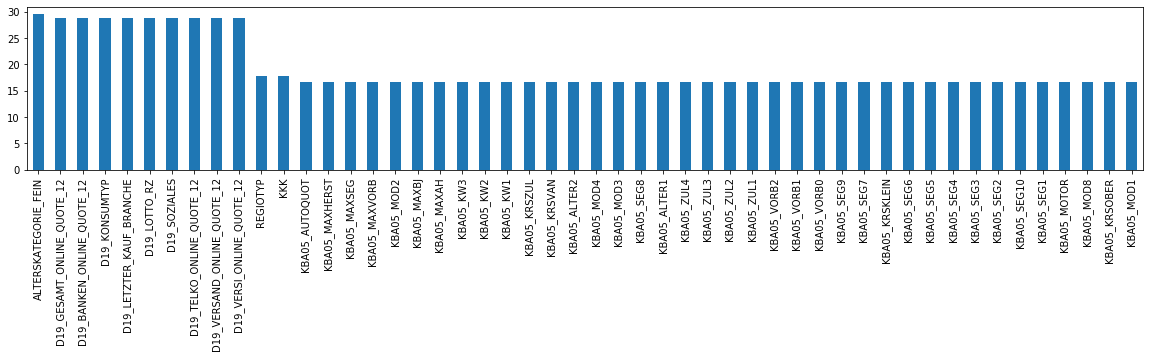

In [24]:
%%time
empty_cells = pd.isnull(azdias).sum()*100.0/azdias.shape[0]
empty_cells = empty_cells.sort_values(ascending=False)
empty_cells[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing features

---
# 03. Missing rows

After we've removed highly incomplete features of our dataset, we'd have to make sure that the individuals present in the dataset (row entries) don't exhibit high missingness. 

We must remove row entries (i.e. subjects) for which a substantial portion of information is missing. I am going to apply **different missingness** threshold `row_missingness_threshold_percentage` to filter entries (rows) - **defined at 50%**. The reason is that I'll be later imputing missing values based, and believe with 50% of entries present per subjects, and a big dataset of general population, I'll be able to successfully impute missing values with features having at most `missingness_threshold_percentage` (set to 30%) missing entries

CPU times: user 1.07 s, sys: 197 ms, total: 1.27 s
Wall time: 1.51 s


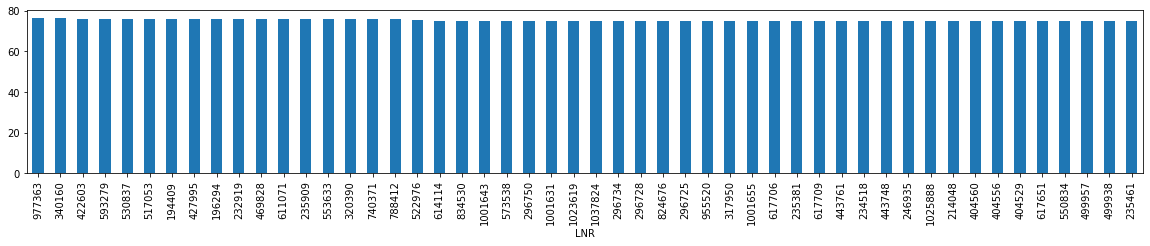

In [25]:
%%time
empty_rows = pd.isnull(azdias).sum(axis=1)*100.0/azdias.shape[1]
empty_rows = empty_rows.sort_values(ascending=False)
empty_rows[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing rows

In [26]:
row_missingness_threshold_percentage = 50

In [27]:
# How many percent of rows/entries/subjects were removed?
sum(empty_rows>row_missingness_threshold_percentage)*100/azdias.shape[0]

11.217980725319533

[]

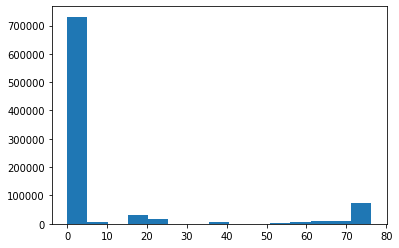

In [28]:
plt.hist(empty_rows,bins=15)
plt.plot()

... and we see that for majority of cases the subjects have almost all features defined.

If 50% missingness for rows is defines as a cutoff threshold, then around 11.22% of the rows/subjects are removed. 

In [29]:
%%time
samples_to_drop =list( (empty_rows[empty_rows>row_missingness_threshold_percentage]).index.values)
azdias.drop(index=samples_to_drop,inplace=True,axis='index')

CPU times: user 673 ms, sys: 473 ms, total: 1.15 s
Wall time: 1.14 s


CPU times: user 859 ms, sys: 201 ms, total: 1.06 s
Wall time: 1.06 s


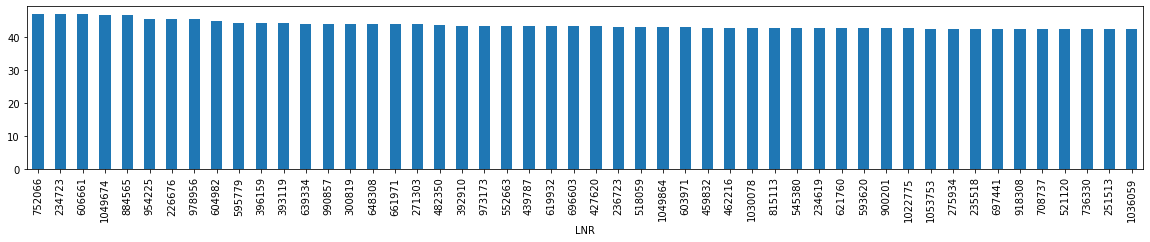

In [30]:
%%time
empty_rows = pd.isnull(azdias).sum(axis=1)*100.0/azdias.shape[1]
empty_rows = empty_rows.sort_values(ascending=False)
empty_rows[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing features

---
# 04. Data types & Feature encoding

We know (from inspecting metadata file ` DIAS Attributes - Values 2017.xlsx`) that some features are encoded as floats, some are presented as ordinal features (where relative order matters), and some are pure categorial features, for example gender.

The latter, pure categorical features, need to be properly encoded.

# Feature Encoding

Features in the `Udacity_AZDIAS_052018`, and described in the provided metadata file `DIAS Attributes - Values 2017.xlsx` are encoded usually by integers, however **for the most part, the features are of ordinal or categorical nature**.



## Features lacking metadata information

First however, let's inspect the unique values the features which lack metadata information hold:

In [130]:
missing_metadata_feature_info =  {}
missing_metadata_feature_info['feature'] = []
missing_metadata_feature_info['unique_counts'] = []
missing_metadata_feature_info['unique_vals'] = []

for f in missing_metadata_annotations:
    unique_vals =  np.unique(azdias[f].dropna() )
    
    missing_metadata_feature_info['feature'].append(f)
    
    missing_metadata_feature_info['unique_counts'].append(len(unique_vals))
    missing_metadata_feature_info['unique_vals'].append(unique_vals)   
    
missing_metadata_feature_info = pd.DataFrame.from_dict(missing_metadata_feature_info)
missing_metadata_feature_info.sort_values('unique_counts',ascending=False, inplace=True)
missing_metadata_feature_info

,feature,unique_counts,unique_vals
21,EINGEFUEGT_AM,4474,"[1991-06-17 00:00:00, 1991-08-30 00:00:00, 199..."
3,ANZ_STATISTISCHE_HAUSHALTE,267,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
44,VERDICHTUNGSRAUM,46,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
22,EINGEZOGENAM_HH_JAHR,37,"[1900.0, 1904.0, 1971.0, 1984.0, 1986.0, 1987...."
13,D19_LETZTER_KAUF_BRANCHE,35,"[D19_BANKEN_DIREKT, D19_BANKEN_GROSS, D19_BANK..."
1,ALTERSKATEGORIE_FEIN,26,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
48,VK_DISTANZ,13,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
49,VK_ZG11,11,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
2,ANZ_KINDER,11,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
47,VK_DHT4A,11,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."


Here I am sorting in an `ascending` manner the the number of unique values. 

Let's discuss some of the features (in order they appear in above table):

`EINGEFUEGT_AM` [**to be removed**]:

    - is some form of year encoding. Looking up the German translation it means "entered", so most likely when a particular user was entered into a database. But we're not sure. **I am going to drop this feature** however, if I had the opportunity to talk with some of the data curators, perhaps a feature could be engineered here. For example, how many years a particular client is staying with a "us" (a particular company). This could divide clients into new/established/old. But because we don't exactly know what it means, and the "story" behind the feature, it is better to drop it 
    
- `ANZ_STATISTISCHE_HAUSHALTE` [**to be encoded as numerical**]:
    - is some for of statistic (`STATISTICSCHE`) relating to the household (`HOUSHALTE`) and its  transation activity (from `ANZ` annotation in metadata file) 

[]

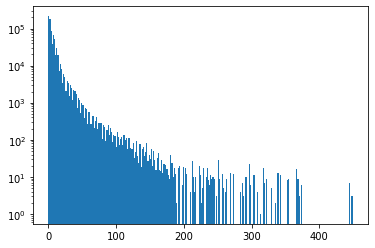

In [136]:
plt.hist(azdias['ANZ_STATISTISCHE_HAUSHALTE'],bins=267,log=True)
plt.plot()

## TODO

Secondly, let's visualize auto-inferred by pandas data types:

(array([263.,   0.,   0.,   0.,   0.,   6.,   0.,   0.,   0.,  64.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

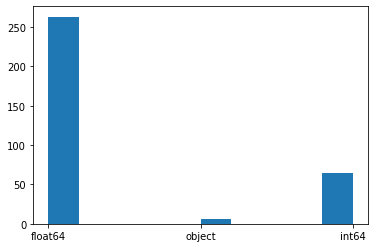

In [67]:
plt.hist([str(x) for x in (azdias.dtypes).to_numpy().squeeze()])

There are some 6 features that are encoded as objects:

In [107]:
azdias.loc[:,azdias.dtypes=="object" ].head()

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_DEUINTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ
LNR,,,,,,
910220,8A,8,51,NaN,1992-02-10 00:00:00,W
910225,4C,4,24,D19_UNBEKANNT,1992-02-12 00:00:00,W
910226,2A,2,12,D19_UNBEKANNT,1997-04-21 00:00:00,W
910241,6B,6,43,D19_SCHUHE,1992-02-12 00:00:00,W
910244,8C,8,54,D19_ENERGIE,1992-02-12 00:00:00,W


Upon inspection, they are encoded as such, because they usually contain a mix of (**auto-inferred**) types: integer and string. 

One variable `EINGEFUEGT_AM` is a datetime stamp, also occurs in `missing_metadata_annotations` variable (a feature of data, for which we do not have description available. `EINGEFUEGT_AM` feautre is later dropped, as it is unclear what it means, and how to properly use it

## TODO: investigate 'obj' types in dataframe

---
# 0X. Feature Imputing

Optional! As XGBOOst can handle missing data, and perhaps it is worth applying a very loose threshold

# NEXT STEPS

# TODO [remove]


0. Feature correlation - Kruskal's lambda;

1. Feature engineering

- variable `missing_metadata_annotations` to encode as categories

- `PRAEGENDE_JUGENDJAHRE` and `CAMEO_INTL_2015` can be split more generally
- need to encode multiple labels that account for the same categories: 
    - `LP_FAMILIE_GROB`,
    - `LP_STATUS_GROB`
    
- encode `D19_LETZTER_KAUF_BRANCHE` as string, it is a nice category, be sure to keep the NAN as NAN
- need to drop some unknown date encoded `EINGEFUEGT_AM`

> `PRAEGENDE_JUGENDJAHR`E - combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, two new variables will be created to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.

> `CAMEO_INTL_2015` - combines information on two axes: wealth and life stage. The two-digit codes will be broken by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).


2. Encode categorical values as strings, or categories
    - check pandas function for types encoding
    - prepare a table: feature -> data types: numerical, categorical or ordinal
    
    
3. prepare `customers` file in the same way
4. concatenate `azdias` and `customers` together
    - analyze intersecting columns
    - select common set of columns/features
    
5. Dimensionality reduction: 
    a. Prince + FAMD. https://github.com/MaxHalford/prince#factor-analysis-of-mixed-data-famd
    b. PCA although wrong


In [62]:
azdias['KBA05_MAXHERST']

LNR
910220    2.0
910225    5.0
910226    3.0
910241    3.0
910244    2.0
         ... 
825761    2.0
825771    2.0
825772    2.0
825776    3.0
825787    4.0
Name: KBA05_MAXHERST, Length: 791244, dtype: float64